## Постановка задачи
Задача страхового скоринга: https://www.kaggle.com/c/prudential-life-insurance-assessment

Требуется провести классификацию клиентов по уровню благонадежности для страхования жизни (всего 8 градаций) - Response. Для оценки доступно несколько параметров: виды страховки (Product_Info), возраст (Ins_Age), рост (Ht), вес (Wt), индекс массы тела (BMI), данные о работе (Employment_Info), данные страховки (InsuredInfo), история страхования (Insurance_History), семья (Family_Hist), медицинские данные (Medical_History) и медицинские термины (Medical_Keyword) - всего 126 переменных.

Загрузим данные и исследуем их. Найдем возможные "утечки" и взаимосвязи параметров для построения моделей.

Данные:
* https://video.ittensive.com/machine-learning/prudential/train.csv.gz

### Подключение библиотек

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 16,8

### Загрузка данных

In [3]:
train = pd.read_csv("https://video.ittensive.com/machine-learning/prudential/train.csv.gz")
print (train.info())
print (train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
None
   Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  

### Распределение значений

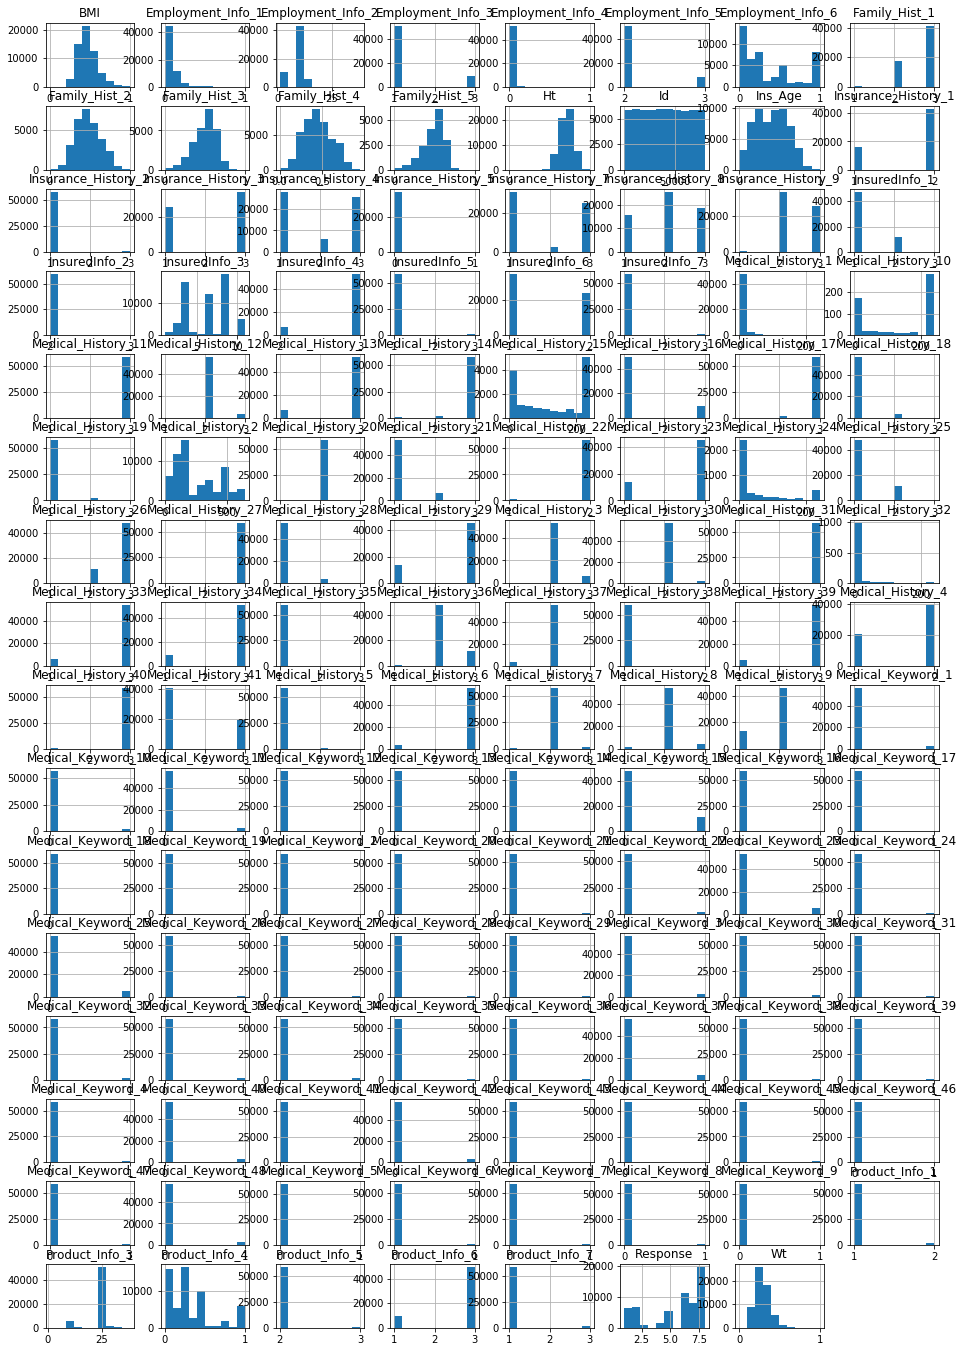

In [4]:
train.hist(figsize=(16,24), layout=(16,8))
plt.show()

### Зависимость скоринга от параметров: история страхования

In [5]:
def data_correlation_plot (df, columns):
    rows = np.ceil(len(columns) / 4)
    fig = plt.figure(figsize=(12, rows*3))
    i = 1
    for column in columns:
        type_ = str(df[column].dtypes)
        if type_[0:3] == "int" or type_[0:5] == "float":
            area = fig.add_subplot(rows, 4, i)
            pd.DataFrame(df,
                columns=["Response", column]).plot.scatter(x=column,
                    y="Response", ax=area)
            i += 1
    plt.show()

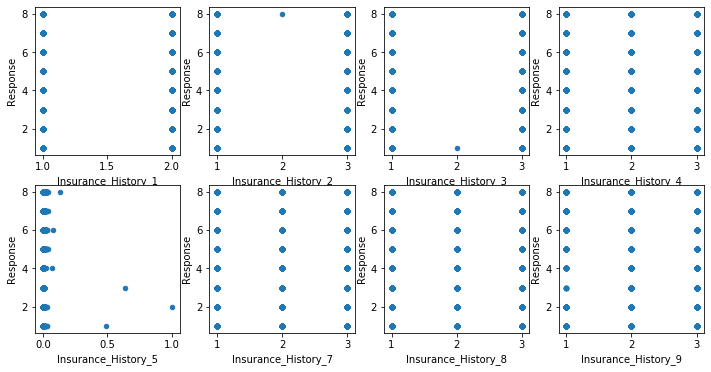

In [6]:
data_correlation_plot(train,
    train.columns[train.columns.str.startswith("Insurance_History")])

### Зависимость скоринга от параметров: параметры страхования

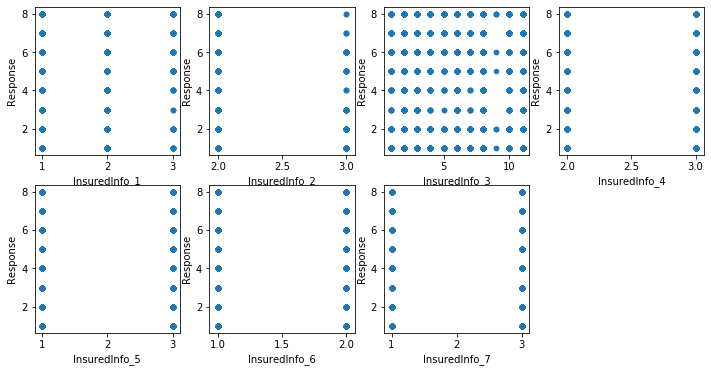

In [7]:
data_correlation_plot(train,
    train.columns[train.columns.str.startswith("InsuredInfo")])

### Зависимость скоринга от параметров: физиология

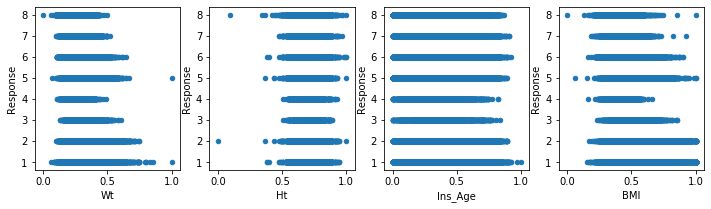

In [8]:
data_correlation_plot(train, ["Wt", "Ht", "Ins_Age", "BMI"])

### Зависимость скоринга от параметров: семья

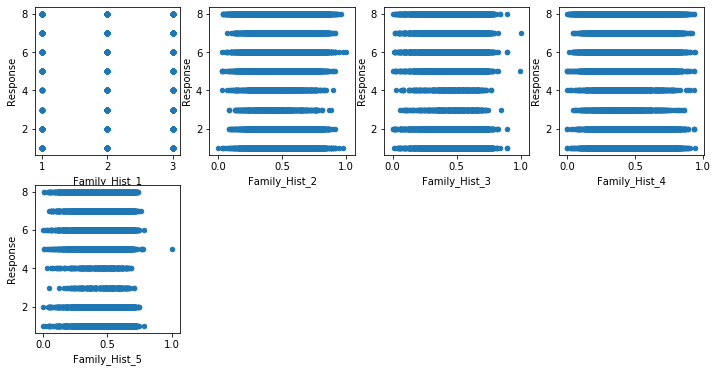

In [9]:
data_correlation_plot(train,
    train.columns[train.columns.str.startswith("Family_Hist")])

### Зависимость скоринга от параметров: здоровье

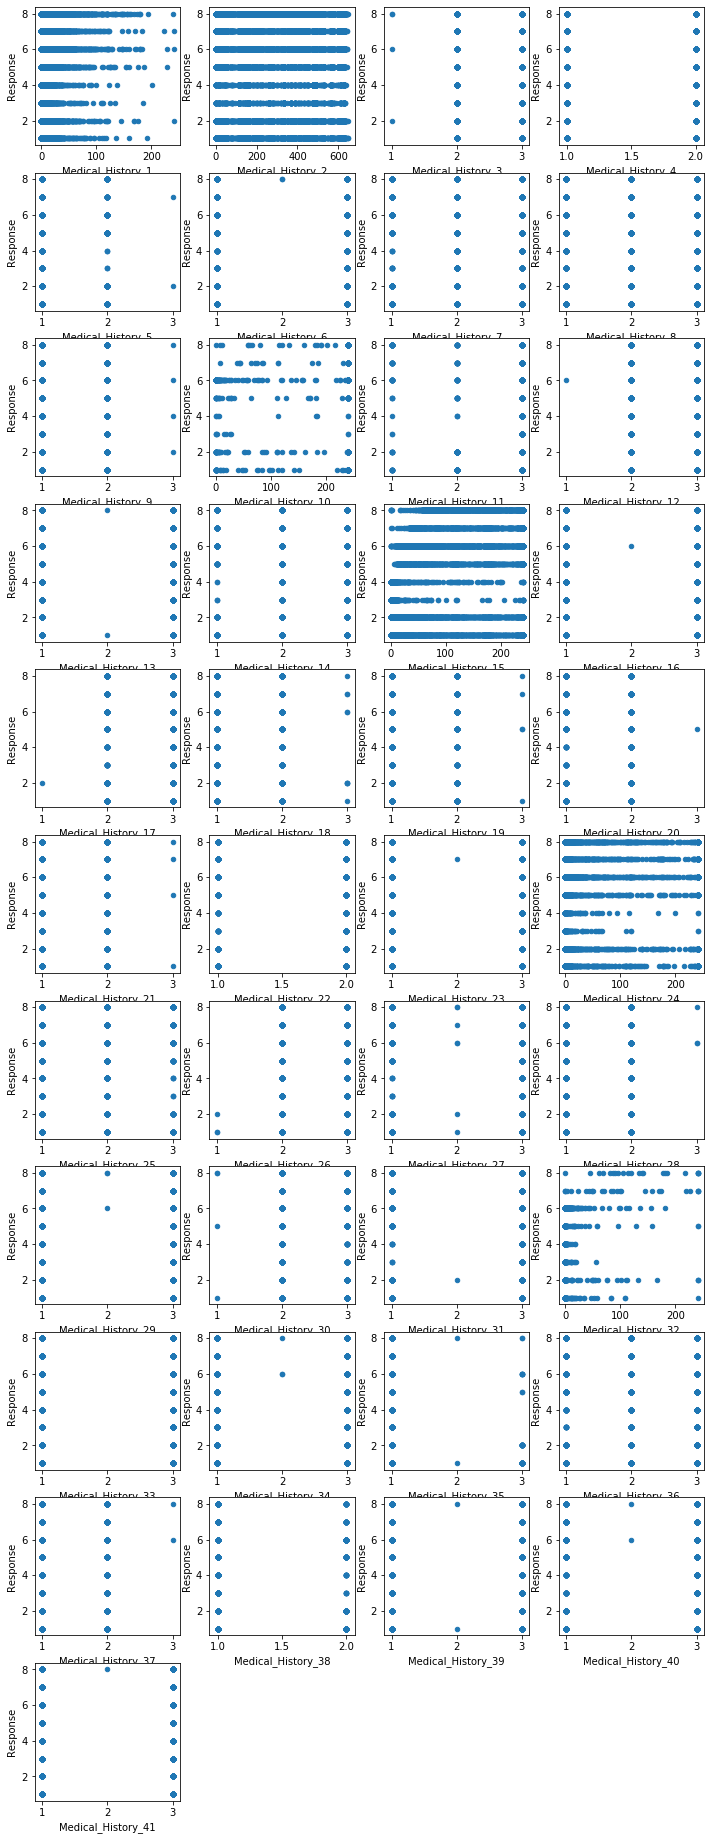

In [10]:
data_correlation_plot(train,
    train.columns[train.columns.str.startswith("Medical_History")])

### Зависимость скоринга от параметров: страховка

In [11]:
train["Product_Info_2_1"] = train["Product_Info_2"].str.slice(0, 1)
train["Product_Info_2_2"] = train["Product_Info_2"].str.slice(1, 2).astype("int8")
train.drop(labels=["Product_Info_2"], axis=1, inplace=True)

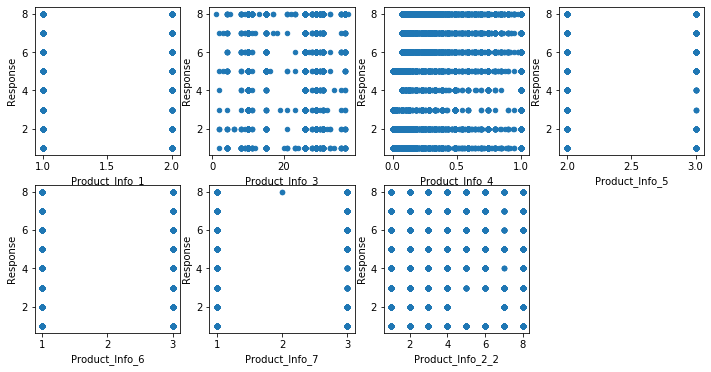

In [12]:
data_correlation_plot(train,
    train.columns[train.columns.str.startswith("Product_Info")])

### Взаимная корреляция биометрии

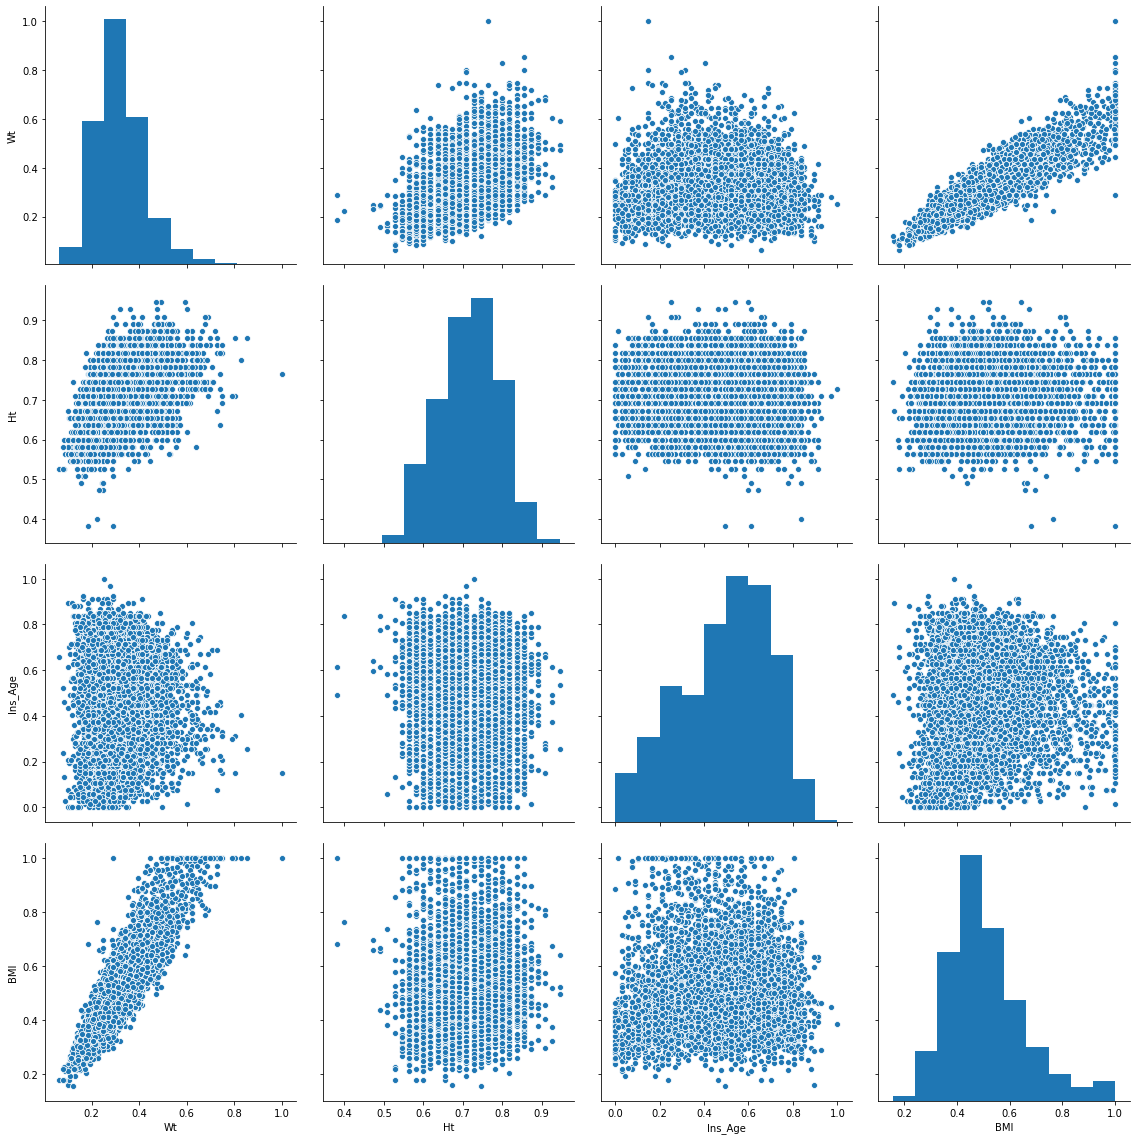

In [14]:
data = pd.DataFrame(train[train["Response"]==1],
        columns=["Wt", "Ht", "Ins_Age", "BMI"])
sns.pairplot(data, height=4)
plt.show()
del data

### Кластеризация по биометрии

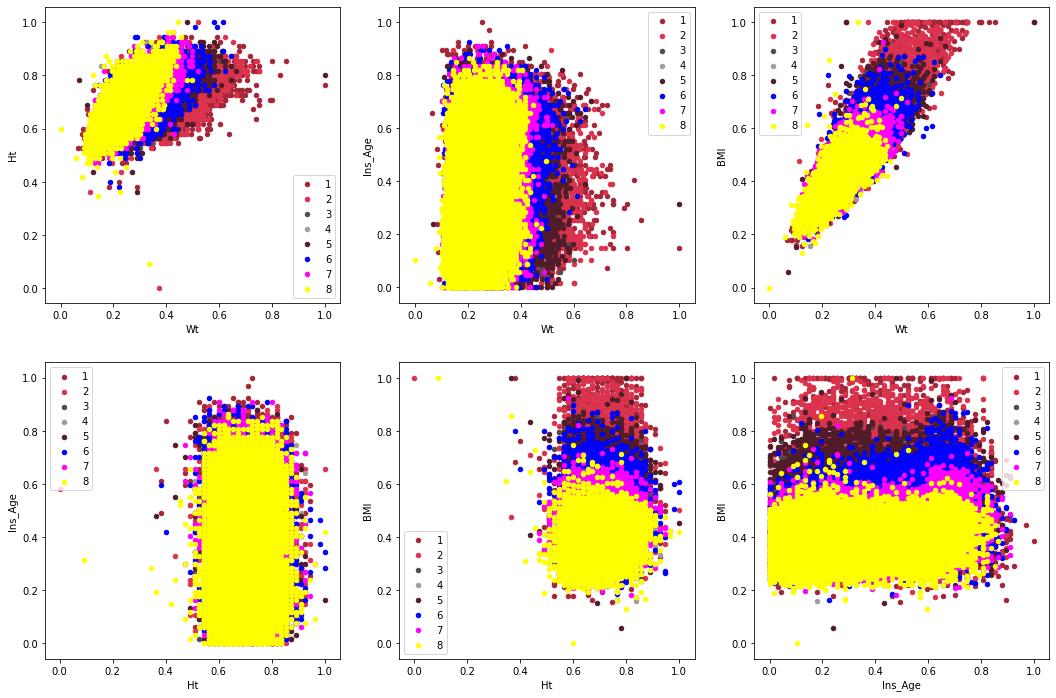

In [17]:
columns_groups = [["Wt", "Ht"], ["Wt", "Ins_Age"], ["Wt", "BMI"],
                 ["Ht", "Ins_Age"], ["Ht", "BMI"], ["Ins_Age", "BMI"]]
colors = ["#A62639", "#DB324D", "#56494E", "#A29C9B", "#511C29",
         "#0000FF", "#FF00FF", "#FFFF00", "#00FFFF", "#00FF00"]
fig = plt.figure(figsize=(18,12))
i = 1
for c in columns_groups:
    data = pd.DataFrame(train, columns=c.append("Response"))
    legend = []
    area = fig.add_subplot(2, 3, i)
    for response in range(1, train["Response"].max() + 1):
        group = data[data["Response"] == response].plot.scatter(x=c[0],
            y=c[1], ax=area, c=colors[response-1])
        legend.append(response)
    area.legend(legend)
    i += 1
    del data
plt.show()